# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [11]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [7]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH'] / 365

In [14]:
# 設定特殊需求的 Bins
bins = pd.IntervalIndex.from_tuples([(20, 25), (25, 30), (30, 35), (35, 40), (40, 45), (45, 50),
                                     (50, 55), (55, 60), (60, 65), (65, 70)])

# 依特殊 Bins 分組
app_train["YEARS_BINNED"] = pd.cut(app_train["YEARS_BIRTH"], bins)
app_train["YEARS_BINNED"]

0         (25, 30]
1         (45, 50]
2         (50, 55]
3         (50, 55]
4         (50, 55]
5         (45, 50]
6         (35, 40]
7         (50, 55]
8         (55, 60]
9         (35, 40]
10        (25, 30]
11        (55, 60]
12        (35, 40]
13        (35, 40]
14        (35, 40]
15        (20, 25]
16        (35, 40]
17        (25, 30]
18        (45, 50]
19        (30, 35]
20        (50, 55]
21        (40, 45]
22        (30, 35]
23        (65, 70]
24        (30, 35]
25        (50, 55]
26        (50, 55]
27        (40, 45]
28        (25, 30]
29        (25, 30]
            ...   
307481    (55, 60]
307482    (35, 40]
307483    (65, 70]
307484    (35, 40]
307485    (30, 35]
307486    (40, 45]
307487    (60, 65]
307488    (25, 30]
307489    (45, 50]
307490    (25, 30]
307491    (30, 35]
307492    (55, 60]
307493    (45, 50]
307494    (40, 45]
307495    (55, 60]
307496    (45, 50]
307497    (45, 50]
307498    (50, 55]
307499    (45, 50]
307500    (55, 60]
307501    (35, 40]
307502    (4

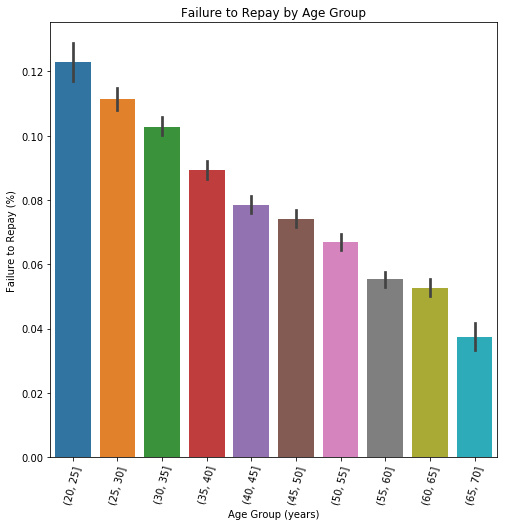

In [15]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
sns.barplot(app_train['YEARS_BINNED'], app_train['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');